# Natural Language Processing - Introduction

**importing needed libraries**

In [40]:
import seaborn as sns
import pandas as pd
import random
import re
import spacy
from spacy.tokenizer import Tokenizer
from collections import Counter

import matplotlib.pyplot as plt
import squarify

### Tokenization

**By character**

In [21]:
string = '29texqevzr3gwvmrpjvde637h4gwd6'

tokens = list(string)

print(tokens)

['2', '9', 't', 'e', 'x', 'q', 'e', 'v', 'z', 'r', '3', 'g', 'w', 'v', 'm', 'r', 'p', 'j', 'v', 'd', 'e', '6', '3', '7', 'h', '4', 'g', 'w', 'd', '6']


**By word**

In [22]:
mysentence = 'Last Friday I saw a spotted striped blue worm shake hands with a legless lizard.'

mysentence.split(' ')

['Last',
 'Friday',
 'I',
 'saw',
 'a',
 'spotted',
 'striped',
 'blue',
 'worm',
 'shake',
 'hands',
 'with',
 'a',
 'legless',
 'lizard.']

**Counting Token Frequency**

C:\Users\tyler\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


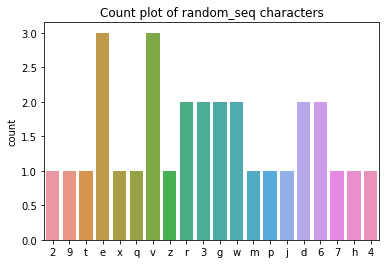

In [23]:
ax = sns.countplot(tokens)
ax.set_title('Count plot of random_seq characters');

**Case Normalization**

- .lower()
- .upper()


In [24]:
# Loading in csv
df = pd.read_csv('data/GroceryStoreDataSet.csv', names=['grocery_list'])

# Processing dataframe to have each row be one grocery item in the items column
grocery_list = df['grocery_list'].to_list()
item_list=[]
for items in grocery_list:
    temp_list = items.split(',')
    for temp_item in temp_list:
        # Adding .lower() at random to demonstrate case normalization
        random_num = random.randint(0,1)
        if random_num == 0:
            temp_item = temp_item.lower()
        item_list.append(temp_item)

# converting new list in to a new dataframe for analysis
grocery_df = pd.DataFrame({'items': item_list})

grocery_df['items'].value_counts()

bread         9
COFFEE        5
BREAD         4
BISCUIT       4
cornflakes    4
tea           4
milk          3
suger         3
coffee        3
TEA           3
SUGER         3
MAGGI         3
BOURNVITA     3
biscuit       3
MILK          2
maggi         2
cock          2
CORNFLAKES    2
JAM           1
jam           1
COCK          1
bournvita     1
Name: items, dtype: int64

In [25]:
# Converting all list items to lower for case normalization
grocery_df['items'] = grocery_df['items'].apply(lambda x: x.lower())

# Looking at the tokens again
grocery_df['items'].value_counts()

bread         13
coffee         8
biscuit        7
tea            7
cornflakes     6
suger          6
milk           5
maggi          5
bournvita      4
cock           3
jam            2
Name: items, dtype: int64

**Alphanumeric Characters**

everything else is pretty much noise and uneeded for our basic use cases of NLP

using re [^a-zA-Z 0-9] to keep only the desired characters

In [26]:
# Random string of characters
string = 'D]ehjZe_*-e!?fdfW)_/zQ2#8*LKH#'

# Filtering and replacing non alphanumeric characters with nothing
re.sub('[^a-zA-Z 0-9]', '', string)

'DehjZeefdfWzQ28LKH'

**Processing Raw Text with Spacy**

- much more production grade processing
- spacy indexes componets to make processing faster as opposted to storing components in various datastructers

In [9]:
# importing pre-trained model small
# nlp = spacy.load("en_core_web_sm") (diffrently sized models)
nlp = spacy.load("en_core_web_lg") # Very large in comparison

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Sample text
sample = "They watched the 42 dancing piglets with panda bear tummies in the swimming pool."

# processing with spacy
[token.text for token in tokenizer(sample)]

['They',
 'watched',
 'the',
 '42',
 'dancing',
 'piglets',
 'with',
 'panda',
 'bear',
 'tummies',
 'in',
 'the',
 'swimming',
 'pool.']

In [ ]:
# Text Generated from https://openai.com/
gpt_3_text = "A group of scientists journey into the jungle and find a lost city. They are captured by the natives and forced to live in the city. The natives are ruled by a queen who is a white woman. The queen is a witch who has the power to turn men into apes. The scientists are forced to live in the city and are forced to mate with the natives. The queen has a daughter who is a white woman. The daughter falls in love with one of the scientists. The queen finds out and has the scientist turned into an ape. The daughter and the other scientists escape the city and return to civilization. The daughter is pregnant with the scientist's child. The daughter gives birth to a baby boy. The baby boy is white. The daughter and the baby boy return to the city to rescue the scientist. The scientist is turned back into a human. The scientist and the daughter return to civilization. The scientists had stds and the daughter and the scientist die from the stds. The end"

[token.text for token in tokenizer(gpt_3_text)]

**Using spaCy to remove stopwords**

- text gathered from https://www.gutenberg.org/
- “Alice in Wonderland” and Lewis Carroll

In [13]:
# spaCy's default stop words
stop_list = list(nlp.Defaults.stop_words)
print("The number of stop words: ", len(stop_list))

print("The first 10 stop words are: ", stop_list[:10])

The number of stop words:  326
The first 10 stop words are:  ['‘d', 'off', 'becoming', 'a', 'back', 'into', 'without', 'whoever', 'mostly', 'someone']


In [34]:
# opening alice in wonderland file
with open('data/alice_in_wonderland.txt', encoding='utf-8', errors='ignore') as f:
    wonder_raw = f.read()

# NLP model
nlp = spacy.load("en_core_web_lg") # Very large in comparison

# Parseing the text
doc = nlp(wonder_raw)
print('The type of oupt is: ', type(doc))
print(doc[:100])

The type of oupt is:  <class 'spacy.tokens.doc.Doc'>
﻿Alice’s Adventures in Wonderland

by Lewis Carroll

CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (


In [37]:
# Removing the stop words and punctuation

# Initialize a list to hold the tokens
tokens_nostop = []

# Loop over each token in the document (doc)
for token in doc:
    if (token.is_stop == False) & (token.is_punct == False):
        # Removing \n from tokens
        token = token.text.strip()
        if token != '':
            # Adding desired tokens
            tokens_nostop.append(token.lower())

# Print the first 50 tokens      
print(tokens_nostop[:50])

['\ufeffalice', 'adventures', 'wonderland', 'lewis', 'carroll', 'chapter', 'i.', 'rabbit', 'hole', 'alice', 'beginning', 'tired', 'sitting', 'sister', 'bank', 'having', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'pictures', 'conversations', 'considering', 'mind', 'hot', 'day', 'feel', 'sleepy', 'stupid', 'pleasure', 'making', 'daisy', 'chain', 'worth', 'trouble', 'getting', 'picking', 'daisies', 'suddenly', 'white', 'rabbit', 'pink', 'eyes']


**Preforming a word count**

In [38]:
# Summing the word counts and storing in a dictionary
token_dict = Counter(tokens_nostop)

# Convert to a DataFrame
tokens_wc = pd.DataFrame(list(token_dict.items()), columns = ['word','count'])

# Rank the words by how frequently they occur
tokens_wc['rank'] = tokens_wc['count'].rank(method='first', ascending=False)

# Count all of the words in the document and calculate their percentage
total = tokens_wc['count'].sum()
tokens_wc['pct_total'] = tokens_wc['count'].apply(lambda x: (x / total)*100)

# Take a look at the DataFrame with new results
tokens_wc.sort_values(by=['rank'], inplace=True)
tokens_wc.head(10)

,word,count,rank,pct_total
133,said,462,1.0,3.866109
9,alice,397,2.0,3.322176
187,little,128,3.0,1.071130
175,know,88,4.0,0.736402
81,like,85,5.0,0.711297
2348,project,85,6.0,0.711297
2349,gutenberg,85,7.0,0.711297
78,went,83,8.0,0.694561
1380,queen,75,9.0,0.627615
23,thought,74,10.0,0.619247


**Plotting word counts against precentage in doc**

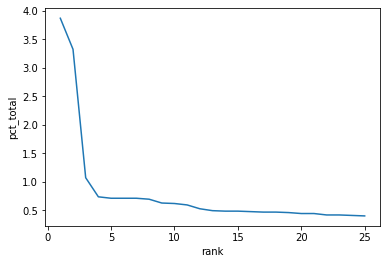

In [39]:
# Create a new DataFrame of the top 25 ranked words
tokens_wc_top25 = tokens_wc[tokens_wc['rank'] <= 25]

# Line plot of rank vs. percent total
sns.lineplot(x='rank', y='pct_total', data=tokens_wc_top25);

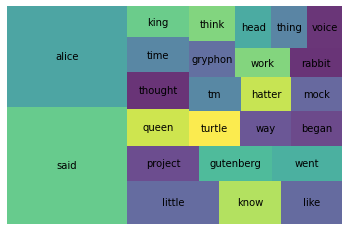

In [41]:
# Creates squares based on value size
squarify.plot(sizes=tokens_wc_top25['pct_total'], label=tokens_wc_top25['word'], alpha=.8 )
plt.axis('off')

plt.show()

**Extending our stop word**

- Removing things like alice and rabbit

In [42]:
# Add additional stop words to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(['alice', 'rabbit'])

**Re-running the above cells to see new squarify map**

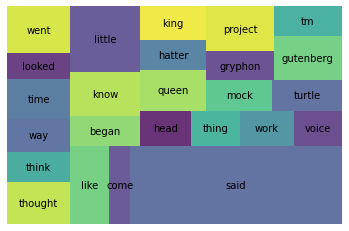

In [44]:
# Initialize a list to hold the tokens
tokens_nostop_add = []

# Loop over each token in the document (doc)
for token in doc:
    if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
        # Removing \n from tokens
        token = token.text.strip()
        if token != '':
            tokens_nostop_add.append(token.lower())

# Sum up the word counts and store in a dict & DataFrame
tokens_dict_add = Counter(tokens_nostop_add)
tokens_wc_add = pd.DataFrame(list(tokens_dict_add.items()), columns = ['word','count'])

# Rank the words & create a percentage column
tokens_wc_add['rank'] = tokens_wc_add['count'].rank(method='first', ascending=False)
total = tokens_wc_add['count'].sum()
tokens_wc_add['pct_total'] = tokens_wc_add['count'].apply(lambda x: (x / total)*100)

# Create a new DataFrame of the NEW top 25 ranked words
tokens_wc_add_top25 = tokens_wc_add[tokens_wc_add['rank'] <= 25]

squarify.plot(sizes=tokens_wc_add_top25['pct_total'], label=tokens_wc_add_top25['word'], alpha=.8 )
plt.axis('off')

plt.show()

**Looking for variation**
- The goal is really to find the variation of words in text so it is worth looking at maybe the least commen words as well

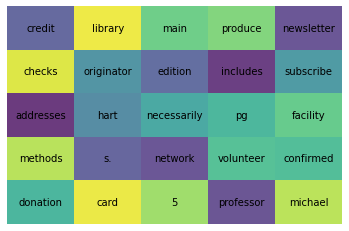

In [45]:
# Create a new DataFrame of the bottom 25 words
tokens_wc_end25 = tokens_wc.tail(25)

squarify.plot(sizes=tokens_wc_end25['pct_total'], label=tokens_wc_end25['word'], alpha=.8 )
plt.axis('off')

plt.show()

### Stemming and lemmatation

- languege is conplex and there is no standard rule for how to do this
- wolf, wolves, goose, geese, automatic, automobile, autocrat, auto

**Stemming**

process of transforming a word and all its inflections to a root word

- not always human readable
- as useful applications in search and infomation retreaval
- it is also relitvly fast

Example with potter stemmer algorithm

*Sample text:* Such and analysis can reveal features that are not easily visible from the variations in the individual genes and can lead to a picture of expression that is more biologically transparent and accessible to interpretation

*Porter stemmer:* such an analysi can reveal featur that ar not easili visibl from the variat in the individu gene and can lead to a pictur of express that is more biolog transpar and access to interpret

**Lemmatization**

Lemmatization, on the other hand, is more methodical. The goal is to transform a word into its base form called a lemma. First, plural nouns with uncommon spellings get changed to the singular tense. Next, verbs are all transformed to the transitive: an action word with something or someone receiving the action such as paint (transitive verb) the canvas (object).

- Computationally intense

In [47]:
# Create an example sentence
sent = "The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well."

# Load the language library
nlp = spacy.load("en_core_web_lg")
doc = nlp(sent)

# Lemma Attributes
for token in doc:
    print(token.text, " --> ", token.lemma_)

The  -->  the
rabbit  -->  rabbit
-  -->  -
hole  -->  hole
went  -->  go
straight  -->  straight
on  -->  on
like  -->  like
a  -->  a
tunnel  -->  tunnel
for  -->  for
some  -->  some
way  -->  way
,  -->  ,
and  -->  and
then  -->  then
dipped  -->  dip
suddenly  -->  suddenly
down  -->  down
,  -->  ,
so  -->  so
suddenly  -->  suddenly
that  -->  that
Alice  -->  Alice
had  -->  have
not  -->  not
a  -->  a
moment  -->  moment
to  -->  to
think  -->  think
about  -->  about
stopping  -->  stop
herself  -->  herself
before  -->  before
she  -->  she
found  -->  find
herself  -->  herself
falling  -->  fall
down  -->  down
a  -->  a
very  -->  very
deep  -->  deep
well  -->  well
.  -->  .


**Preforming more in depth lemmas transformation**

- using spacy

In [48]:
# Tokenizing and lemmatizing in one function
def get_lemmas(text): 
    # Initialize a list
    lemmas = []
    # Convert the input text into a spaCy doc
    doc = nlp(text) 
    # Remove stop words, punctuation, and personal pronouns (PRON)
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_) 
    # Return the lemmatized tokens
    return lemmas

In [49]:
# Example text (https://en.wikipedia.org/wiki/Geology)
geology = ["Geology describes the structure of the Earth on and beneath its surface, and the processes that have shaped that structure.",
        "It also provides tools to determine the relative and absolute ages of rocks found in a given location, and also to describe the histories of those rocks.", 
        "By combining these tools, geologists are able to chronicle the geological history of the Earth as a whole, and also to demonstrate the age of the Earth.",
        "Geology provides the primary evidence for plate tectonics, the evolutionary history of life, and the Earth's past climates."]

In [50]:
# Find the lemmas for each sentence in the above text
geology_lemma = [get_lemmas(sentence) for sentence in geology]
print(geology_lemma)

[['geology', 'describe', 'structure', 'Earth', 'beneath', 'surface', 'process', 'shape', 'structure'], ['provide', 'tool', 'determine', 'relative', 'absolute', 'age', 'rock', 'find', 'give', 'location', 'describe', 'history', 'rock'], ['combine', 'tool', 'geologist', 'able', 'chronicle', 'geological', 'history', 'Earth', 'demonstrate', 'age', 'Earth'], ['geology', 'provide', 'primary', 'evidence', 'plate', 'tectonic', 'evolutionary', 'history', 'life', 'Earth', 'past', 'climate']]
